<a href="https://colab.research.google.com/github/juanfcogmtnez/angular-ivy-itkbuk/blob/master/iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import parallel_coordinates
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [24]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data (2).csv


In [25]:
import io
data = pd.read_csv(io.BytesIO(uploaded['data.csv']))

In [26]:
data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [27]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [28]:
data.groupby('species').size()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [30]:
train, test = train_test_split(data, test_size = 0.4, stratify = data['species'], random_state = 42)

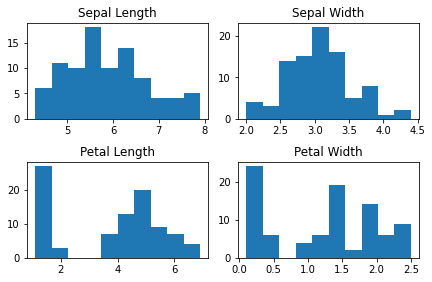

In [31]:
n_bins = 10
fig, axs = plt.subplots(2, 2)
axs[0,0].hist(train['sepal_length'], bins = n_bins);
axs[0,0].set_title('Sepal Length');
axs[0,1].hist(train['sepal_width'], bins = n_bins);
axs[0,1].set_title('Sepal Width');
axs[1,0].hist(train['petal_length'], bins = n_bins);
axs[1,0].set_title('Petal Length');
axs[1,1].hist(train['petal_width'], bins = n_bins);
axs[1,1].set_title('Petal Width');
# add some spacing between subplots
fig.tight_layout(pad=1.0);

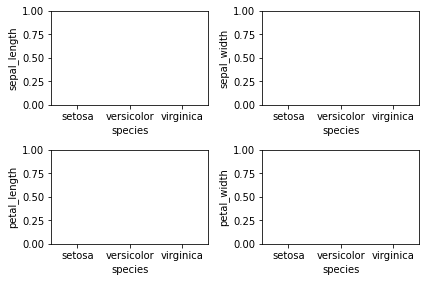

In [32]:
fig, axs = plt.subplots(2, 2)
fn = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
cn = ['setosa', 'versicolor', 'virginica']
sns.boxplot(x = 'species', y = 'sepal_length', data = train, order = cn, ax = axs[0,0]);
sns.boxplot(x = 'species', y = 'sepal_width', data = train, order = cn, ax = axs[0,1]);
sns.boxplot(x = 'species', y = 'petal_length', data = train, order = cn, ax = axs[1,0]);
sns.boxplot(x = 'species', y = 'petal_width', data = train,  order = cn, ax = axs[1,1]);
# add some spacing between subplots
fig.tight_layout(pad=1.0);

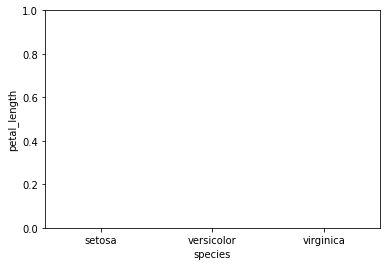

In [33]:
sns.violinplot(x="species", y="petal_length", data=train, size=5, order = cn, palette = 'colorblind');

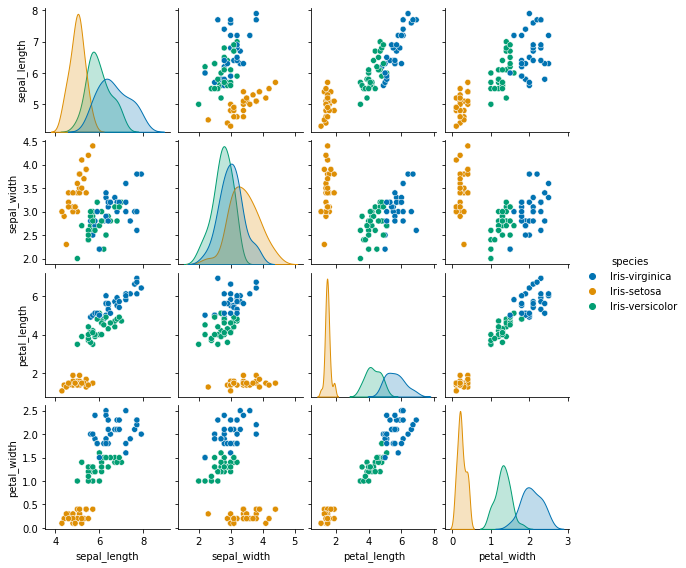

In [34]:
sns.pairplot(train, hue="species", height = 2, palette = 'colorblind');

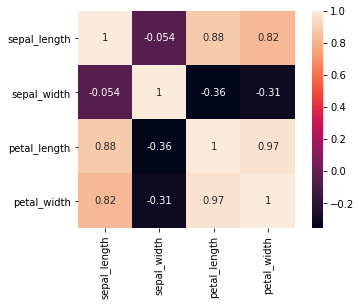

In [35]:
corrmat = train.corr()
sns.heatmap(corrmat, annot = True, square = True);

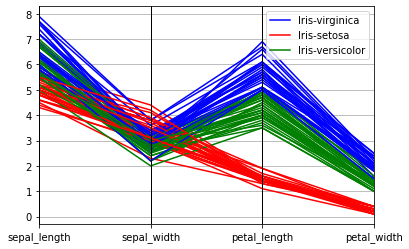

In [36]:
parallel_coordinates(train, "species", color = ['blue', 'red', 'green']);

In [37]:
X_train = train[['sepal_length','sepal_width','petal_length','petal_width']]
y_train = train.species
X_test = test[['sepal_length','sepal_width','petal_length','petal_width']]
y_test = test.species

In [41]:
mod_dt = DecisionTreeClassifier(max_depth = 3, random_state = 1)
mod_dt.fit(X_train,y_train)
prediction=mod_dt.predict(X_test)
print('The accuracy of the Decision Tree is','{:.3f}'.format(metrics.accuracy_score(prediction,y_test)))

The accuracy of the Decision Tree is 0.983


In [42]:
mod_dt.feature_importances_

array([0.        , 0.        , 0.42430866, 0.57569134])

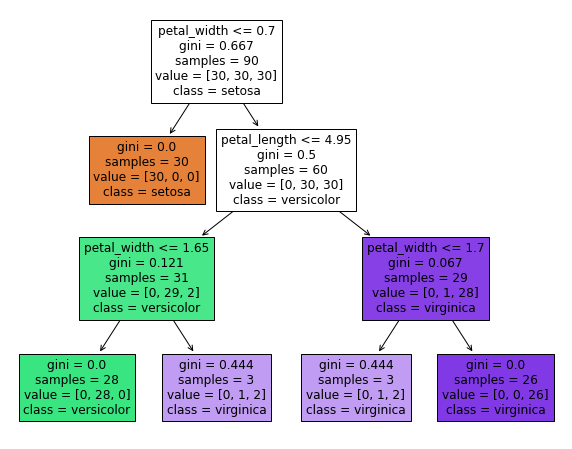

In [43]:
plt.figure(figsize = (10,8))
plot_tree(mod_dt, feature_names = fn, class_names = cn, filled = True);

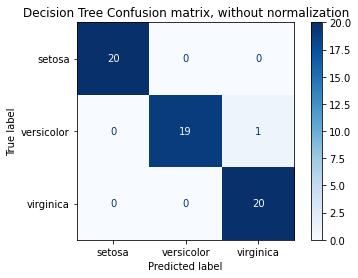

In [44]:
disp = metrics.plot_confusion_matrix(mod_dt, X_test, y_test,
                                 display_labels=cn,
                                 cmap=plt.cm.Blues,
                                 normalize=None)
disp.ax_.set_title('Decision Tree Confusion matrix, without normalization');